### Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

### Import Dataset

In [12]:
# LINK DATASET : https://www.kaggle.com/code/alun007/drug-prediction-decision-tree-classification
data = pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Explore Dataset

In [13]:
data.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

### Preparing Data

In [28]:
# Encode kolom yang bertipe diskrit
df_encoded = data
columns_to_encode = ['Sex', 'BP', 'Cholesterol']
le = LabelEncoder()
for column in columns_to_encode:
    df_encoded[column] = le.fit_transform(df_encoded[column])
data.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
5,22,0,2,0,8.607,drugX
6,49,0,2,0,16.275,DrugY
7,41,1,1,0,11.037,drugC
8,60,1,2,0,15.171,DrugY
9,43,1,1,1,19.368,DrugY


In [15]:
# Fitur
x = data[['Age','Sex','BP','Cholesterol','Na_to_K']]
# Label
y = data[['Drug']]
y = df_encoded['Drug']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                y, test_size=0.20, random_state=42)

In [17]:
# Training menggunakan model Decision Tree
model = DecisionTreeClassifier();
model.fit(x, y)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

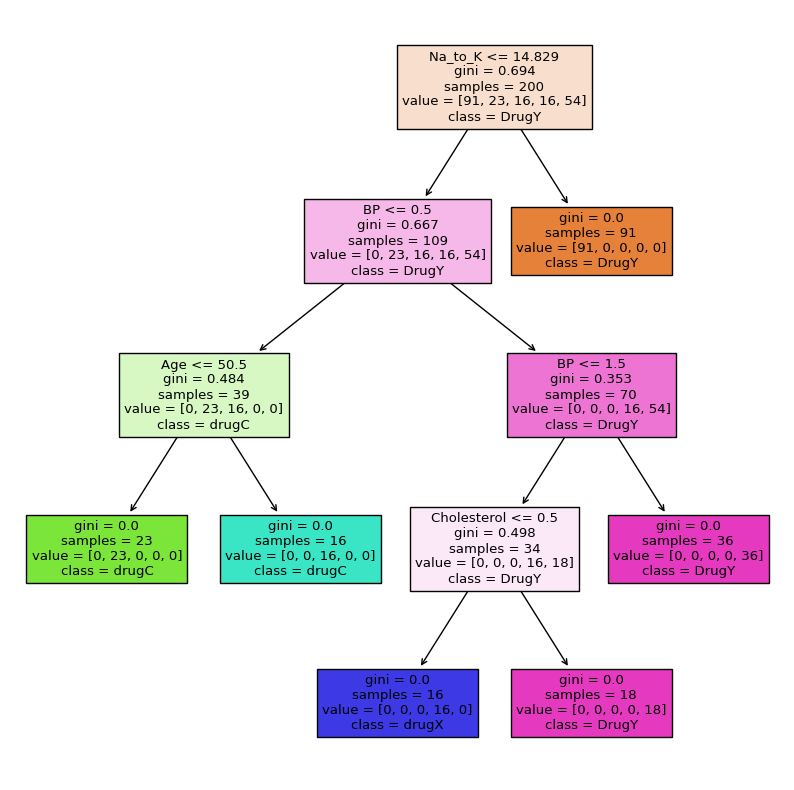

In [18]:
# Plotting Decision Tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, feature_names=x.columns, class_names=y, filled=True, ax=ax)

plt.show

In [19]:
data_unpruned =DecisionTreeClassifier(max_depth=None, random_state=42)
data_model = data_unpruned.fit(x_train, y_train)
print("Performance without tuning:", data_model.score(x_test, y_test))
print("At depth:", data_model.tree_.max_depth)

Performance without tuning: 1.0
At depth: 4


In [33]:
# Menampilkan hasil prediksi
hasilPrediksi = model.predict(x_test)
hasil_prediksi = pd.DataFrame(hasilPrediksi, columns=['Predict'])
hasil_prediksi.index = x_test.index
df_baru = pd.concat([x_test, hasil_prediksi], axis=1)
df_baru['Sex'] = df_baru['Sex'].replace({0: 'Female', 1: 'Male'})
df_baru['BP'] = df_baru['BP'].replace({0: 'High', 1: 'Normal', 2: 'Low'})
df_baru['Cholesterol'] = df_baru['Cholesterol'].replace({0: 'High', 1: 'Normal'})
df_baru.head()
# hasil_prediksi = pd.concat([x_test, pd.DataFrame(hasilPrediksi, columns=['Hasil Prediksi'])], axis=0, ignore_index=True)
# hasil_prediksi

,Age,Sex,BP,Cholesterol,Na_to_K,Predict
95,36,Male,Normal,Normal,11.424,drugX
15,16,Female,High,Normal,15.516,DrugY
30,18,Female,Low,Normal,8.750,drugX
158,59,Female,Normal,High,10.444,drugC
128,47,Male,Normal,Normal,33.542,DrugY


In [34]:
prediksiBenar = (hasilPrediksi == y_test).sum()
prediksiSalah = (hasilPrediksi != y_test).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 40 data
Prediksi Salah : 0 data
Akurasi : 100.0 %
